In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
csv_data = "../ETL/miami_df_final.csv"
miami_df = pd.read_csv(csv_data)

In [3]:
cols = ["neighborhood", "br", "ba", "sqft", "housingType", "laundry", "parking", "cats", "dogs",\
       "furnished", "rent"]
miami_df = miami_df[cols].copy()
miami_df

,neighborhood,br,ba,sqft,housingType,laundry,parking,cats,dogs,furnished,rent
0,Dadeland,2,2.0,NaN,apartment,w/d in unit,carport,no,no,no,1900
1,Doral,2,2.0,NaN,apartment,w/d in unit,attached garage,no,no,no,2557
2,Miami,2,2.0,1106.0,apartment,w/d in unit,off-street parking,yes,yes,no,2241
3,Doral,3,2.0,NaN,apartment,w/d in unit,attached garage,no,no,no,3399
4,Doral,1,1.0,NaN,apartment,w/d in unit,attached garage,no,no,no,1978
...,...,...,...,...,...,...,...,...,...,...,...
1831,Miami,1,1.0,NaN,apartment,w/d in unit,carport,no,no,no,1950
1832,Miami Beach,2,2.0,1300.0,apartment,w/d in unit,carport,no,no,no,2500
1833,Kendall,2,2.0,NaN,apartment,w/d in unit,carport,no,no,no,1500
1834,Fontainebleau,2,2.5,NaN,apartment,w/d in unit,carport,no,no,no,1700


In [5]:
# replace Nan values in miami_df['sqft']
miami_df['sqft'] = miami_df['sqft'].apply(str)
miami_df.loc[miami_df['sqft'].str.contains('nan'), 'sqft'] = "0"
miami_df['sqft'] = pd.to_numeric(miami_df['sqft'])
miami_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  1836 non-null   object 
 1   br            1836 non-null   int64  
 2   ba            1836 non-null   float64
 3   sqft          1836 non-null   float64
 4   housingType   1836 non-null   object 
 5   laundry       1836 non-null   object 
 6   parking       1836 non-null   object 
 7   cats          1836 non-null   object 
 8   dogs          1836 non-null   object 
 9   furnished     1836 non-null   object 
 10  rent          1836 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 157.9+ KB


In [21]:
miami_df

,neighborhood,br,ba,sqft,housingType,laundry,parking,cats,dogs,furnished,rent
0,Dadeland,2,2.0,0.0,apartment,w/d in unit,carport,no,no,no,1900
1,Doral,2,2.0,0.0,apartment,w/d in unit,attached garage,no,no,no,2557
2,Miami,2,2.0,1106.0,apartment,w/d in unit,off-street parking,yes,yes,no,2241
3,Doral,3,2.0,0.0,apartment,w/d in unit,attached garage,no,no,no,3399
4,Doral,1,1.0,0.0,apartment,w/d in unit,attached garage,no,no,no,1978
...,...,...,...,...,...,...,...,...,...,...,...
1831,Miami,1,1.0,0.0,apartment,w/d in unit,carport,no,no,no,1950
1832,Miami Beach,2,2.0,1300.0,apartment,w/d in unit,carport,no,no,no,2500
1833,Kendall,2,2.0,0.0,apartment,w/d in unit,carport,no,no,no,1500
1834,Fontainebleau,2,2.5,0.0,apartment,w/d in unit,carport,no,no,no,1700


In [6]:
miami_df.describe()

,br,ba,sqft,rent
count,1836.000000,1836.00000,1836.000000,1836.000000
mean,1.735294,1.69390,342.716231,2016.338235
std,0.774721,0.55118,538.560115,799.370174
min,0.000000,1.00000,0.000000,500.000000
25%,1.000000,1.00000,0.000000,1500.000000
50%,2.000000,2.00000,0.000000,1800.000000
75%,2.000000,2.00000,750.000000,2250.000000
max,5.000000,4.50000,2921.000000,4950.000000


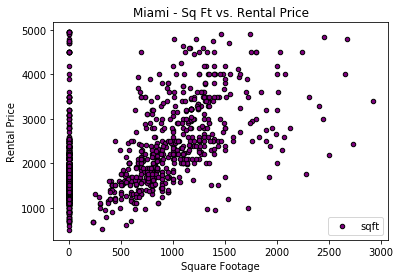

In [22]:
plt.figure()
plt.scatter(miami_df['sqft'],miami_df['rent'], s=20, edgecolor="black",c="purple", label="sqft")
plt.xlabel("Square Footage")
plt.ylabel("Rental Price")
plt.title("Miami - Sq Ft vs. Rental Price")
plt.legend()
plt.show()

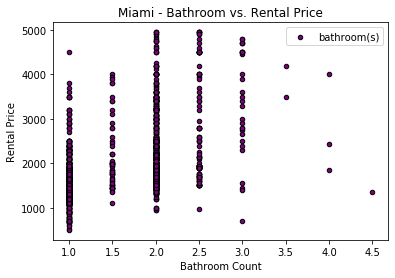

In [23]:
plt.figure()
plt.scatter(miami_df['ba'],miami_df['rent'], s=20, edgecolor="black",c="purple", label="bathroom(s)")
plt.xlabel("Bathroom Count")
plt.ylabel("Rental Price")
plt.title("Miami - Bathroom vs. Rental Price")
plt.legend()
plt.show()

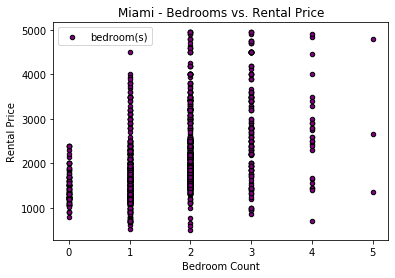

In [24]:
plt.figure()
plt.scatter(miami_df['br'],miami_df['rent'], s=20, edgecolor="black",c="purple", label="bedroom(s)")
plt.xlabel("Bedroom Count")
plt.ylabel("Rental Price")
plt.title("Miami - Bedrooms vs. Rental Price")
plt.legend()
plt.show()

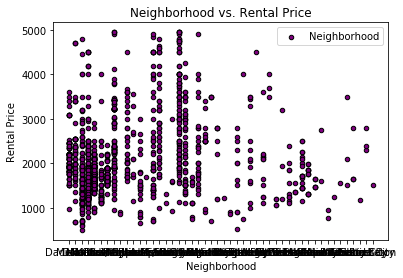

In [10]:
plt.figure()
plt.scatter(miami_df['neighborhood'],miami_df['rent'], s=20, edgecolor="black",c="purple", label="Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Rental Price")
plt.title("Neighborhood vs. Rental Price")
plt.legend()
plt.show()

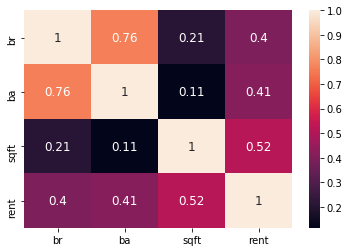

In [11]:
import seaborn as sn
## keep only numerical columns
X = miami_df
## correlation matrix
corrMatrix = X.corr()
## visualize it in a heatmap
sn.heatmap(corrMatrix, annot=True, annot_kws={'size': 12})
plt.show()

## Data Preprocessing
Binary Encoded data, Scale or Normalize data

In [12]:
X = miami_df["sqft"].values.reshape(-1, 1)
y = miami_df["rent"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1836, 1) (1836, 1)


In [13]:
# Split data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

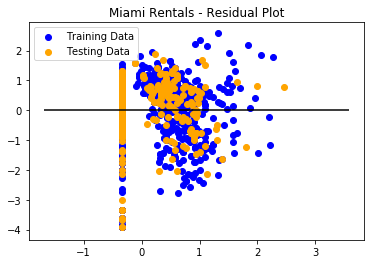

In [15]:
# Fit the Model to the scaled training data and make predictions using the scaled test data

# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Miami Rentals - Residual Plot")
plt.show()

In [16]:
# Quantify your model using the scaled data

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
errors = abs(predictions - y_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {round(MSE,2)}\nR2: {round(r2, 2)}")

MSE: 0.65
R2: 0.22


In [17]:
predictions1 = y_scaler.inverse_transform(predictions)

In [18]:
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions1[0]}")
print(f"Prediction Error: {predictions1[0] - y_test[0]}")

True output: [1900]
Predicted output: [1760.58158332]
Prediction Error: [710.58158332]


In [19]:
df = pd.DataFrame({'Predicted': predictions1.ravel(), 'Actual': y_test.ravel(), 'Abs Error': errors.ravel()})
df

,Predicted,Actual,Abs Error
0,1760.581583,1050,0.871489
1,2189.754813,1750,0.539335
2,1760.581583,1850,0.109667
3,2882.674501,1500,1.695773
4,1760.581583,2185,0.520526
...,...,...,...
454,1760.581583,1495,0.325721
455,1760.581583,2000,0.293633
456,1760.581583,2100,0.416278
457,1760.581583,1890,0.158724


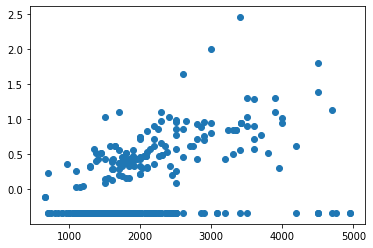

In [20]:
plt.scatter(y_test, predictions)